In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("../acIndUtils/")

import xarray as xr
import numpy as np
import pandas as pd
import acIndUtils, acIndSalinityGraphicUtils

In [2]:
"""
Loading the perimeter of the area of interest and setting a few parameters
"""
areaPerimeter = pd.read_csv("../areas/areaNAdriatic.csv")
verticalLevels = -np.arange(0, 1000, 2)
maxDepth = -30 # max depth for vertical profiles

In [3]:
rawDataFileSpec = acIndUtils.acNcFileSpec(
    ncFileName="/Volumes/Nereide-1/dataset/CMEMS_REANALYSIS/SALINITY__since_1987/*_daily_cmems_reanalysis_salinity_AdriaticSea.nc", 
    varName="so", xVarName="lon", yVarName="lat", zVarName="depth", tVarName="time" )
rawDataFileSpec.printSpec()
ncClippedDataFileSpec = acIndUtils.acCloneFileSpec(rawDataFileSpec, ncFileName="salinityClippedData.nc")
annualMapsNcFileSpec = acIndUtils.acCloneFileSpec(ncClippedDataFileSpec, ncFileName="salinityClippedAnnualMean.nc", tVarName="year")
winterMapsNcFileSpec = acIndUtils.acCloneFileSpec(annualMapsNcFileSpec, ncFileName="salinityClippedWinterMean.nc")
summerMapsNcFileSpec = acIndUtils.acCloneFileSpec(annualMapsNcFileSpec, ncFileName="salinityClippedSummerMean.nc")
trendMapNcSpec = acIndUtils.acCloneFileSpec(annualMapsNcFileSpec, ncFileName="salinityTrendMap.nc")

  ncFileName: /Volumes/Nereide-1/dataset/CMEMS_REANALYSIS/SALINITY__since_1987/*_daily_cmems_reanalysis_salinity_AdriaticSea.nc
  varName: so
  xVarName: lon
  yVarName: lat
  zVarName: depth
  tVarName: time


**Generating the pre-aggregates**

In [4]:
"""
clipping the input data over the area of interest (may require some time)
"""
clippedData = acIndUtils.acClipDataOnRegion(rawDataFileSpec, areaPerimeter, ncClippedDataFileSpec.ncFileName)

CMEMS SST Dimension: <acIndUtils.acIndUtils.acNcFileSpec object at 0x7fd6e87c7eb0>
Clipped Area Dimensions:            LON        LAT
0    12.903055  43.924718
1    12.818609  43.963191
2    12.764718  43.970273
3    12.753573  43.971000
4    12.740555  43.972218
..         ...        ...
107  14.674445  45.182218
108  14.724864  45.148609
109  14.752782  45.135691
110  14.800282  45.123055
111  14.831527  45.115418

[112 rows x 2 columns]


Exception: file /Volumes/Nereide-1/dataset/CMEMS_REANALYSIS/SALINITY__since_1987/*_daily_cmems_reanalysis_salinity_AdriaticSea.nc not found

In [10]:
"""
Generating the temporary nc file with the annual means
"""
acIndUtils.acGenerateAnnualMeanMaps(ncClippedDataFileSpec, annualMapsNcFileSpec.ncFileName)
print("done")

done


In [12]:
"""
Generating the temporary nc file with the winter means
"""
acIndUtils.acGenerateSeasonalWinter(ncClippedDataFileSpec, winterMapsNcFileSpec.ncFileName)
print("done")

done


In [13]:
"""
Generating the temporary nc file with the summer means
"""
acIndUtils.acGenerateSeasonalSummer(ncClippedDataFileSpec, summerMapsNcFileSpec.ncFileName)
print("done")

done


In [26]:
"""
Generating the temporary nc file with the map of trend.
"""
acIndUtils.acComputeSenSlope3DMap(annualMapsNcFileSpec, trendMapNcSpec.ncFileName)
print("done")

done


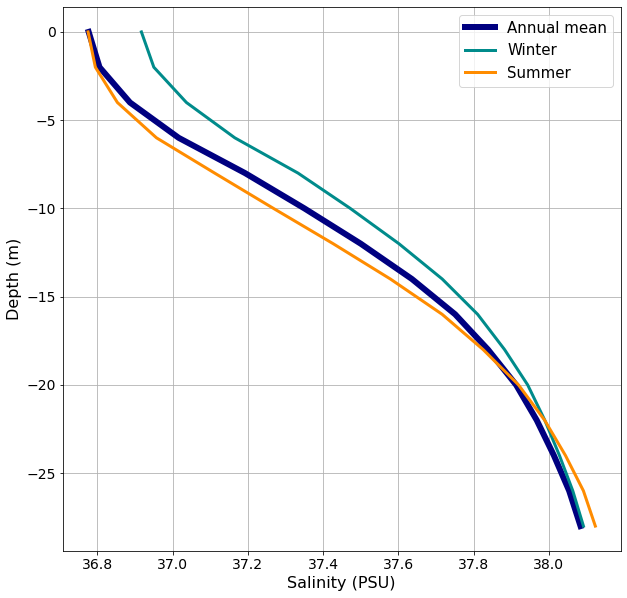

In [25]:
"""
Vertical mean profiles of salinity: annual, winter, summer
"""
figVProf = acIndSalinityGraphicUtils.acSalinityPlotVProfileAll(annualMapsNcFileSpec, 
                                                    summerMapsNcFileSpec, 
                                                    winterMapsNcFileSpec, 
                                                    maxDepth, zlevs=verticalLevels)

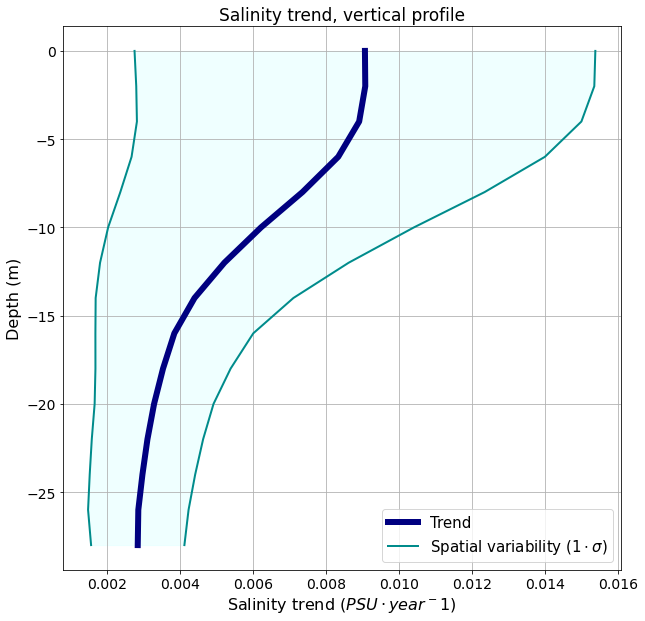

In [29]:
"""
Trend of salinity, vertical profile
"""
figVProfTrend = acIndSalinityGraphicUtils.acSalinityPlotVProfileTrend(trendMapNcSpec, maxDepth, zlevs=verticalLevels)